In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/ip/desktop/3S_ISPO/online_retail.csv')

In [4]:
print(df)

   OrderID            Date  CustomerID         Country       Product  \
0   536365  12/1/2024 8:26     17850.0  United Kingdom  White Hanger   
1   536366  12/1/2024 8:28     17850.0  United Kingdom     Cream Cup   
2   536367  12/1/2024 8:34         NaN          France   Alarm Clock   
3   536368  12/1/2024 8:34     13047.0          France   Toy Soldier   
4   536368  12/1/2024 8:34     13047.0          France   Toy Soldier   
5   536369  12/1/2024 8:35     13047.0         Germany    Wooden Box   
6   536370  12/1/2024 8:45     12583.0          France    Toy Rabbit   
7   536371  12/1/2024 9:00     13748.0         Germany     Red Scarf   
8   536372  12/1/2024 9:01     13748.0  United Kingdom    Blue Scarf   

   Quantity  UnitPrice   Category  
0         6       2.55  Household  
1         2       1.85    Kitchen  
2        -1       3.75      Decor  
3         3       2.10       Toys  
4         3       2.10       Toys  
5         1       2.10      Decor  
6        -2       2.10     

In [6]:
df = df.drop_duplicates() #UKLANJANJE DUPLIH REDOVA

In [7]:
print(df)

   OrderID            Date  CustomerID         Country       Product  \
0   536365  12/1/2024 8:26     17850.0  United Kingdom  White Hanger   
1   536366  12/1/2024 8:28     17850.0  United Kingdom     Cream Cup   
2   536367  12/1/2024 8:34         NaN          France   Alarm Clock   
3   536368  12/1/2024 8:34     13047.0          France   Toy Soldier   
5   536369  12/1/2024 8:35     13047.0         Germany    Wooden Box   
6   536370  12/1/2024 8:45     12583.0          France    Toy Rabbit   
7   536371  12/1/2024 9:00     13748.0         Germany     Red Scarf   
8   536372  12/1/2024 9:01     13748.0  United Kingdom    Blue Scarf   

   Quantity  UnitPrice   Category  
0         6       2.55  Household  
1         2       1.85    Kitchen  
2        -1       3.75      Decor  
3         3       2.10       Toys  
5         1       2.10      Decor  
6        -2       2.10        NaN  
7         6       4.25    Apparel  
8        10       4.25    Apparel  


In [8]:
(df["Quantity"] < 0).sum() #PROVJERA NEGAITVNIH VRIJEDNOSTI --> ISPISUJE BROJ REDOVA KOJI SADRŽE NEGATIVNE VRIJEDNOSTI

np.int64(2)

In [9]:
df = df[df["Quantity"] > 0] #UKLANJANJE NEGATIVNIH REDOVA

In [14]:
print("Negativnih količina nakon čišćenja:", (df["Quantity"] < 0).sum()) #PROVJERA NAKON ČIŠĆENJA

Negativnih količina nakon čišćenja: 0


In [16]:
 #RJEŠAVANJE PROBLEMA NEDOSTAJAĆUJIH VRIJEDNOSTI

In [17]:
df.isnull().sum() #OVA NAREDBA PRIKAZUJE BROJ PRAZNIH (NaN) VRIJEDNOSTI U SVAKOM STUPCU --> PREMA OVOME IH TRENUTNO NEMA

OrderID       0
Date          0
CustomerID    0
Country       0
Product       0
Quantity      0
UnitPrice     0
Category      0
dtype: int64

In [18]:
df.dtypes #PROVJERA TIPOVA PODATAKA STUPACA

OrderID         int64
Date           object
CustomerID    float64
Country        object
Product        object
Quantity        int64
UnitPrice     float64
Category       object
dtype: object

In [19]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce') #PROMJENA TIPA PODATAKA STUPCA DATE (DATUM) IZ OBJECT U DATE

In [21]:
df.dtypes #PROVJERA TIPOVA PODATAKA STUPACA NAKON IZMJENA

OrderID                int64
Date          datetime64[ns]
CustomerID           float64
Country               object
Product               object
Quantity               int64
UnitPrice            float64
Category              object
dtype: object

In [22]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"] # KREIRANJE STUPACA REVENUE

In [23]:
df["DayOfWeek"] = df["Date"].dt.day_name() # KREIRANJE STUPCA DAY OF WEEK

In [24]:
df[["Date", "DayOfWeek", "Quantity", "UnitPrice", "Revenue"]].head() #PROVEJRA NOVIH STUPACA

,Date,DayOfWeek,Quantity,UnitPrice,Revenue
0,2024-12-01 08:26:00,Sunday,6,2.55,15.3
1,2024-12-01 08:28:00,Sunday,2,1.85,3.7
3,2024-12-01 08:34:00,Sunday,3,2.10,6.3
5,2024-12-01 08:35:00,Sunday,1,2.10,2.1
7,2024-12-01 09:00:00,Sunday,6,4.25,25.5


In [25]:
print(df)

   OrderID                Date  CustomerID         Country       Product  \
0   536365 2024-12-01 08:26:00     17850.0  United Kingdom  White Hanger   
1   536366 2024-12-01 08:28:00     17850.0  United Kingdom     Cream Cup   
3   536368 2024-12-01 08:34:00     13047.0          France   Toy Soldier   
5   536369 2024-12-01 08:35:00     13047.0         Germany    Wooden Box   
7   536371 2024-12-01 09:00:00     13748.0         Germany     Red Scarf   
8   536372 2024-12-01 09:01:00     13748.0  United Kingdom    Blue Scarf   

   Quantity  UnitPrice   Category  Revenue DayOfWeek  
0         6       2.55  Household     15.3    Sunday  
1         2       1.85    Kitchen      3.7    Sunday  
3         3       2.10       Toys      6.3    Sunday  
5         1       2.10      Decor      2.1    Sunday  
7         6       4.25    Apparel     25.5    Sunday  
8        10       4.25    Apparel     42.5    Sunday  


In [26]:
# ****************************************************************************************

In [27]:
# **********************Podaci su očišćeni i pripremljeni za analizu**********************

In [28]:
# ****************************************************************************************

In [29]:
#           Pitanje 1: Tko su naši najbolji kupci?????????????????????????

In [30]:
revenue_per_customer = df.groupby("CustomerID")["Revenue"].sum() #UKUPAN PRIHOD PO KUPCU

In [38]:
top5_customers = df.groupby("CustomerID")["Revenue"].sum().sort_values(ascending=False).head(5) ####TOP 5 KUPACA PO UKUPNOM PRIHODU
top5_customers

CustomerID
13748.0    68.0
17850.0    19.0
13047.0     8.4
Name: Revenue, dtype: float64

In [39]:
import matplotlib.pyplot as plt #IMPORTANJE LIBRARYA ZA GRAFIKONE

In [41]:
top5_customers = top5_customers.reset_index()  # indeks -> stupac
top5_customers.columns = ["CustomerID", "TotalRevenue"]

<BarContainer object of 3 artists>

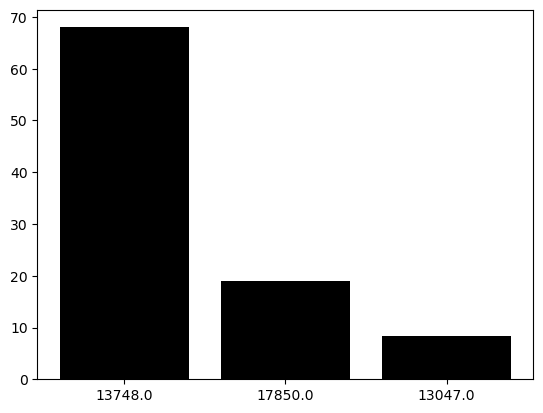

In [45]:
plt.bar(top5_customers["CustomerID"].astype(str), top5_customers["TotalRevenue"], color='BLACK')

In [46]:
######################Koja je prosječna vrijednost narudžbe po državi?####################
##########################################################################################

In [48]:
order_revenue = df.groupby(["Country", "OrderID"])["Revenue"].sum().reset_index() #PRIHOD SVAKE POJEDINE NARUDZBE

In [49]:
avg_revenue_per_order = order_revenue.groupby("Country")["Revenue"].mean().reset_index() # PROSJECAN PRIHOD PO NARUDZBI PO DRZAVI
avg_revenue_per_order.columns = ["Country", "AvgRevenuePerOrder"]

In [54]:
order_revenue = df.groupby(["Country", "OrderID"])["Revenue"].sum().reset_index() #Ukupan prihod po narudžbi unutar svake države
avg_revenue_per_order = order_revenue.groupby("Country")["Revenue"].mean().reset_index() #Prosječan prihod po narudžbi po državi
avg_revenue_per_order.columns = ["Country", "AvgRevenuePerOrder"]
avg_revenue_per_order_sorted = avg_revenue_per_order.sort_values("AvgRevenuePerOrder", ascending=False) #Sortiranje od najveće prema najmanjoj
avg_revenue_per_order_sorted #Prikaz tablice

,Country,AvgRevenuePerOrder
2,United Kingdom,20.5
1,Germany,13.8
0,France,6.3


In [60]:
top5_countries = avg_revenue_per_order_sorted.head(5) #UZIMA TOP 5 DRZAVA PO UKUPNOM PRIODU KOJE SU VEĆ SORTIRANE (avg_revenue_per_order_sorted)

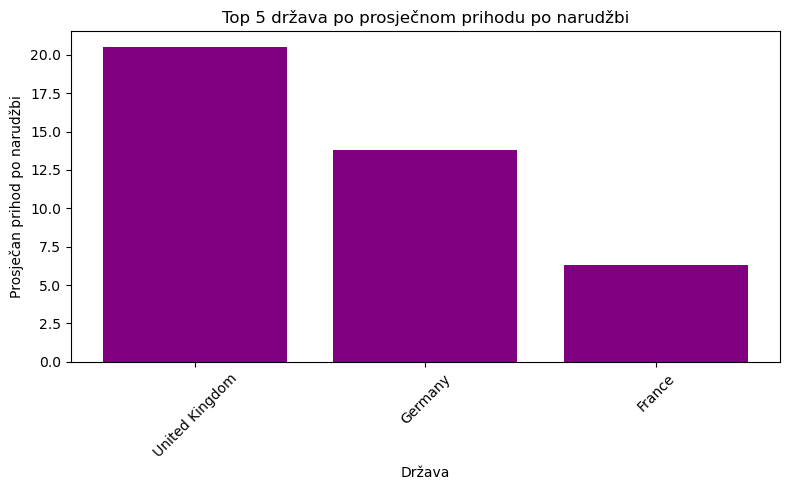

In [62]:
plt.figure(figsize=(8,5))
plt.bar(top5_countries["Country"], top5_countries["AvgRevenuePerOrder"], color='PURPLE')

plt.title("Top 5 država po prosječnom prihodu po narudžbi")
plt.xlabel("Država")
plt.ylabel("Prosječan prihod po narudžbi")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [63]:
######################Kakva je distribucija cijena proizvoda (UnitPrice)?####################
##########################################################################################

In [70]:
df["UnitPrice"].describe() # STATISTICKI PREGLED CIJENA

count    6.0000
mean     2.8500
std      1.1077
min      1.8500
25%      2.1000
50%      2.3250
75%      3.8250
max      4.2500
Name: UnitPrice, dtype: float64

<Axes: >

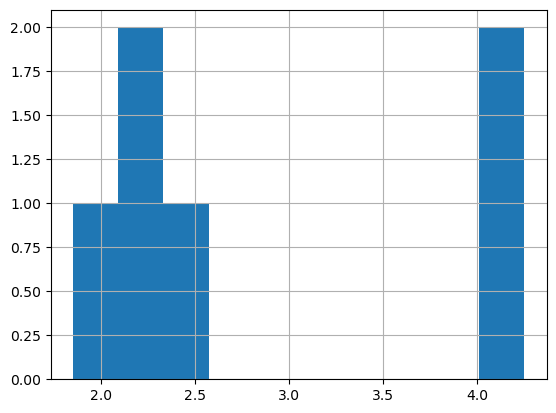

In [71]:
df["UnitPrice"].hist() #HISTOGRAM

In [78]:
data_filtrirano = df[df["UnitPrice"] < 5]

<Axes: >

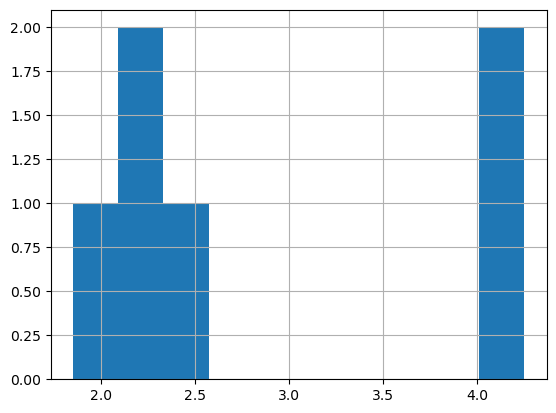

In [79]:
# Histogram filtriranih cijena
data_filtrirano["UnitPrice"].hist()

In [3]:
#x os bi trebala predstavljati interavle cijena koje su manje od 5, a os y koliko se proizvoda nalazi u svakom od tih raspona.

In [4]:
# vecina proizvoda je u cjenovnom rangu 1-3???